# Giga Recurrent Unbounded Network ➿

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset, SequentialSampler, RandomSampler
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler
import wandb
from IPython.display import Markdown

## Data Preprocessing & Loading

In [1]:
%run ./Modules/DataPreprocessing.ipynb

### Training Dataframe

INV01_CurrentDC(A)  INV01_CurrentAC(A)  \
timestamp                                                     
2022-06-01 00:00:00                 0.0                 0.0   
2022-06-01 00:15:00                 0.0                 0.0   
2022-06-01 00:30:00                 0.0                 0.0   
2022-06-01 00:45:00                 0.0                 0.0   
2022-06-01 01:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-12-31 22:45:00                 0.0                 0.0   
2022-12-31 23:00:00                 0.0                 0.0   
2022-12-31 23:15:00                 0.0                 0.0   
2022-12-31 23:30:00                 0.0                 0.0   
2022-12-31 23:45:00                 0.0                 0.0   

                     INV01_TotalEnergy(kWh)  INV01_PowerAC(kW)  \
timestamp                                                        
2022-06-01 00:00:00                0.000000                0.0   
2022-06-01 00:15:00                0.154618                0.0   
2022-06-01 00:30:00                0.154618                0.0   
2022-06-01 00:45:00                0.154618                0.0   
2022-06-01 01:00:00                0.154618                0.0   
...                                     ...                ...   
2022-12-31 22:45:00                1.000000                0.0   
2022-12-31 23:00:00                1.000000                0.0   
2022-12-31 23:15:00                1.000000                0.0   
2022-12-31 23:30:00                1.000000                0.0   
2022-12-31 23:45:00                1.000000                0.0   

                     INV01_PowerDC(kW)  INV01_InternalTemperature(C)  \
timestamp                                                              
2022-06-01 00:00:00                0.0                           0.0   
2022-06-01 00:15:00                0.0                           0.0   
2022-06-01 00:30:00                0.0                           0.0   
2022-06-01 00:45:00                0.0                           0.0   
2022-06-01 01:00:00                0.0                           0.0   
...                                ...                           ...   
2022-12-31 22:45:00                0.0                           0.0   
2022-12-31 23:00:00                0.0                           0.0   
2022-12-31 23:15:00                0.0                           0.0   
2022-12-31 23:30:00                0.0                           0.0   
2022-12-31 23:45:00                0.0                           0.0   

                     INV01_HeatSinkTemperature(C)  INV01_VoltageDC(V)  \
timestamp                                                               
2022-06-01 00:00:00                           0.0                 0.0   
2022-06-01 00:15:00                           0.0                 0.0   
2022-06-01 00:30:00                           0.0                 0.0   
2022-06-01 00:45:00                           0.0                 0.0   
2022-06-01 01:00:00                           0.0                 0.0   
...                                           ...                 ...   
2022-12-31 22:45:00                           0.0                 0.0   
2022-12-31 23:00:00                           0.0                 0.0   
2022-12-31 23:15:00                           0.0                 0.0   
2022-12-31 23:30:00                           0.0                 0.0   
2022-12-31 23:45:00                           0.0                 0.0   

                     INV01_VoltageAC(V)  INV02_CurrentDC(A)  ...  rain (mm)  \
timestamp                                                    ...              
2022-06-01 00:00:00                 0.0                 0.0  ...        0.0   
2022-06-01 00:15:00                 0.0                 0.0  ...        0.0   
2022-06-01 00:30:00                 0.0                 0.0  ...        0.0   
2022-06-01 00:45:00                 0.0                 0.0 

### Validation Dataframe

INV01_CurrentDC(A)  INV01_CurrentAC(A)  \
timestamp                                                     
2023-01-01 00:00:00                 0.0                 0.0   
2023-01-01 00:15:00                 0.0                 0.0   
2023-01-01 00:30:00                 0.0                 0.0   
2023-01-01 00:45:00                 0.0                 0.0   
2023-01-01 01:00:00                 0.0                 0.0   
...                                 ...                 ...   
2023-01-31 22:45:00                 0.0                 0.0   
2023-01-31 23:00:00                 0.0                 0.0   
2023-01-31 23:15:00                 0.0                 0.0   
2023-01-31 23:30:00                 0.0                 0.0   
2023-01-31 23:45:00                 0.0                 0.0   

                     INV01_TotalEnergy(kWh)  INV01_PowerAC(kW)  \
timestamp                                                        
2023-01-01 00:00:00                0.563588                0.0   
2023-01-01 00:15:00                1.000000                0.0   
2023-01-01 00:30:00                1.000000                0.0   
2023-01-01 00:45:00                1.000000                0.0   
2023-01-01 01:00:00                1.000000                0.0   
...                                     ...                ...   
2023-01-31 22:45:00                1.065661                0.0   
2023-01-31 23:00:00                1.065661                0.0   
2023-01-31 23:15:00                1.065661                0.0   
2023-01-31 23:30:00                1.065661                0.0   
2023-01-31 23:45:00                1.065661                0.0   

                     INV01_PowerDC(kW)  INV01_InternalTemperature(C)  \
timestamp                                                              
2023-01-01 00:00:00                0.0                           0.0   
2023-01-01 00:15:00                0.0                           0.0   
2023-01-01 00:30:00                0.0                           0.0   
2023-01-01 00:45:00                0.0                           0.0   
2023-01-01 01:00:00                0.0                           0.0   
...                                ...                           ...   
2023-01-31 22:45:00                0.0                           0.0   
2023-01-31 23:00:00                0.0                           0.0   
2023-01-31 23:15:00                0.0                           0.0   
2023-01-31 23:30:00                0.0                           0.0   
2023-01-31 23:45:00                0.0                           0.0   

                     INV01_HeatSinkTemperature(C)  INV01_VoltageDC(V)  \
timestamp                                                               
2023-01-01 00:00:00                           0.0                 0.0   
2023-01-01 00:15:00                           0.0                 0.0   
2023-01-01 00:30:00                           0.0                 0.0   
2023-01-01 00:45:00                           0.0                 0.0   
2023-01-01 01:00:00                           0.0                 0.0   
...                                           ...                 ...   
2023-01-31 22:45:00                           0.0                 0.0   
2023-01-31 23:00:00                           0.0                 0.0   
2023-01-31 23:15:00                           0.0                 0.0   
2023-01-31 23:30:00                           0.0                 0.0   
2023-01-31 23:45:00                           0.0                 0.0   

                     INV01_VoltageAC(V)  INV02_CurrentDC(A)  ...  rain (mm)  \
timestamp                                                    ...              
2023-01-01 00:00:00                 0.0                 0.0  ...        0.0   
2023-01-01 00:15:00                 0.0                 0.0  ...        0.0   
2023-01-01 00:30:00                 0.0                 0.0  ...        0.0   
2023-01-01 00:45:00                 0.0                 0.0 

### Testing Dataframe

INV01_CurrentDC(A)  INV01_CurrentAC(A)  \
timestamp                                                     
2023-02-01 00:00:00            0.000000            0.000000   
2023-02-01 00:15:00            0.000000            0.000000   
2023-02-01 00:30:00            0.000000            0.000000   
2023-02-01 00:45:00            0.000000            0.000000   
2023-02-01 01:00:00            0.000000            0.000000   
...                                 ...                 ...   
2023-02-28 22:45:00            0.321166            0.411974   
2023-02-28 23:00:00            0.321166            0.411974   
2023-02-28 23:15:00            0.321166            0.411974   
2023-02-28 23:30:00            0.321166            0.411974   
2023-02-28 23:45:00            0.321166            0.411974   

                     INV01_TotalEnergy(kWh)  INV01_PowerAC(kW)  \
timestamp                                                        
2023-02-01 00:00:00                0.607363           0.000000   
2023-02-01 00:15:00                1.065661           0.000000   
2023-02-01 00:30:00                1.065661           0.000000   
2023-02-01 00:45:00                1.065661           0.000000   
2023-02-01 01:00:00                1.065661           0.000000   
...                                     ...                ...   
2023-02-28 22:45:00                1.161360           0.409118   
2023-02-28 23:00:00                1.161360           0.409118   
2023-02-28 23:15:00                1.161360           0.409118   
2023-02-28 23:30:00                1.161360           0.409118   
2023-02-28 23:45:00                1.161360           0.409118   

                     INV01_PowerDC(kW)  INV01_InternalTemperature(C)  \
timestamp                                                              
2023-02-01 00:00:00           0.000000                      0.000000   
2023-02-01 00:15:00           0.000000                      0.000000   
2023-02-01 00:30:00           0.000000                      0.000000   
2023-02-01 00:45:00           0.000000                      0.000000   
2023-02-01 01:00:00           0.000000                      0.000000   
...                                ...                           ...   
2023-02-28 22:45:00           0.415037                      0.217311   
2023-02-28 23:00:00           0.415037                      0.217311   
2023-02-28 23:15:00           0.415037                      0.217311   
2023-02-28 23:30:00           0.415037                      0.217311   
2023-02-28 23:45:00           0.415037                      0.217311   

                     INV01_HeatSinkTemperature(C)  INV01_VoltageDC(V)  \
timestamp                                                               
2023-02-01 00:00:00                      0.000000             0.00000   
2023-02-01 00:15:00                      0.000000             0.00000   
2023-02-01 00:30:00                      0.000000             0.00000   
2023-02-01 00:45:00                      0.000000             0.00000   
2023-02-01 01:00:00                      0.000000             0.00000   
...                                           ...                 ...   
2023-02-28 22:45:00                      0.585633             0.83682   
2023-02-28 23:00:00                      0.585633             0.83682   
2023-02-28 23:15:00                      0.585633             0.83682   
2023-02-28 23:30:00                      0.585633             0.83682   
2023-02-28 23:45:00                      0.585633             0.83682   

                     INV01_VoltageAC(V)  INV02_CurrentDC(A)  ...  rain (mm)  \
timestamp                                                    ...              
2023-02-01 00:00:00             0.00000                 0.0  ...   0.000000   
2023-02-01 00:15:00             0.00000                 0.0  ...   0.000000   
2023-02-01 00:30:00             0.00000                 0.0  ...   0.000000   
2023-02-01 00:45:00             0.00000                 0.0 

### Tests

In [2]:
train_dataset = CustomDataset(train_df, BATCH_SIZE)

In [3]:
len(train_dataset)

208

In [4]:
b, t, f, a, mask_b, mask_t, mask_a, timestamps = train_dataset[100]

print(len(mask_b), len(mask_t), len(mask_a))

display(Markdown("### Before"))
display(b)
display(Markdown("### Target"))
display(t)
display(Markdown("### Future"))
display(f)
display(Markdown("### After"))
display(a)
display(Markdown("### Timestamps"))
display(timestamps)


384 384 384


### Before

INV01_CurrentDC(A)  INV01_CurrentAC(A)  \
timestamp                                                     
2022-09-09 00:00:00                 0.0                 0.0   
2022-09-09 00:15:00                 0.0                 0.0   
2022-09-09 00:30:00                 0.0                 0.0   
2022-09-09 00:45:00                 0.0                 0.0   
2022-09-09 01:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-09-09 22:45:00                 0.0                 0.0   
2022-09-09 23:00:00                 0.0                 0.0   
2022-09-09 23:15:00                 0.0                 0.0   
2022-09-09 23:30:00                 0.0                 0.0   
2022-09-09 23:45:00                 0.0                 0.0   

                     INV01_TotalEnergy(kWh)  INV01_PowerAC(kW)  \
timestamp                                                        
2022-09-09 00:00:00                0.331906                0.0   
2022-09-09 00:15:00                0.652476                0.0   
2022-09-09 00:30:00                0.652476                0.0   
2022-09-09 00:45:00                0.652476                0.0   
2022-09-09 01:00:00                0.652476                0.0   
...                                     ...                ...   
2022-09-09 22:45:00                0.656996                0.0   
2022-09-09 23:00:00                0.656996                0.0   
2022-09-09 23:15:00                0.656996                0.0   
2022-09-09 23:30:00                0.656996                0.0   
2022-09-09 23:45:00                0.656996                0.0   

                     INV01_PowerDC(kW)  INV01_InternalTemperature(C)  \
timestamp                                                              
2022-09-09 00:00:00                0.0                           0.0   
2022-09-09 00:15:00                0.0                           0.0   
2022-09-09 00:30:00                0.0                           0.0   
2022-09-09 00:45:00                0.0                           0.0   
2022-09-09 01:00:00                0.0                           0.0   
...                                ...                           ...   
2022-09-09 22:45:00                0.0                           0.0   
2022-09-09 23:00:00                0.0                           0.0   
2022-09-09 23:15:00                0.0                           0.0   
2022-09-09 23:30:00                0.0                           0.0   
2022-09-09 23:45:00                0.0                           0.0   

                     INV01_HeatSinkTemperature(C)  INV01_VoltageDC(V)  \
timestamp                                                               
2022-09-09 00:00:00                           0.0                 0.0   
2022-09-09 00:15:00                           0.0                 0.0   
2022-09-09 00:30:00                           0.0                 0.0   
2022-09-09 00:45:00                           0.0                 0.0   
2022-09-09 01:00:00                           0.0                 0.0   
...                                           ...                 ...   
2022-09-09 22:45:00                           0.0                 0.0   
2022-09-09 23:00:00                           0.0                 0.0   
2022-09-09 23:15:00                           0.0                 0.0   
2022-09-09 23:30:00                           0.0                 0.0   
2022-09-09 23:45:00                           0.0                 0.0   

                     INV01_VoltageAC(V)  INV02_CurrentDC(A)  ...  rain (mm)  \
timestamp                                                    ...              
2022-09-09 00:00:00                 0.0                 0.0  ...        0.0   
2022-09-09 00:15:00                 0.0                 0.0  ...        0.0   
2022-09-09 00:30:00                 0.0                 0.0  ...        0.0   
2022-09-09 00:45:00                 0.0                 0.0 

### Target

timestamp
2022-09-10 00:00:00    0.0
2022-09-10 00:15:00    0.0
2022-09-10 00:30:00    0.0
2022-09-10 00:45:00    0.0
2022-09-10 01:00:00    0.0
                      ... 
2022-09-11 22:45:00    0.0
2022-09-11 23:00:00    0.0
2022-09-11 23:15:00    0.0
2022-09-11 23:30:00    0.0
2022-09-11 23:45:00    0.0
Freq: 15T, Name: target, Length: 192, dtype: float64

### Future

Impianto_SolargisGHI(W/m2)  Impianto_SolargisGTI(W/m2)  \
timestamp                                                                     
2022-09-10 00:00:00                         0.0                         0.0   
2022-09-10 00:15:00                         0.0                         0.0   
2022-09-10 00:30:00                         0.0                         0.0   
2022-09-10 00:45:00                         0.0                         0.0   
2022-09-10 01:00:00                         0.0                         0.0   
...                                         ...                         ...   
2022-09-11 22:45:00                         0.0                         0.0   
2022-09-11 23:00:00                         0.0                         0.0   
2022-09-11 23:15:00                         0.0                         0.0   
2022-09-11 23:30:00                         0.0                         0.0   
2022-09-11 23:45:00                         0.0                         0.0   

                     month_sin  month_cos  hour_sin  hour_cos  minute_sin  \
timestamp                                                                   
2022-09-10 00:00:00   0.333333        0.5   0.50000  0.833333    0.788675   
2022-09-10 00:15:00   0.000000        0.5   0.50000  1.000000    1.000000   
2022-09-10 00:30:00   0.000000        0.5   0.50000  1.000000    0.211325   
2022-09-10 00:45:00   0.000000        0.5   0.50000  1.000000    0.000000   
2022-09-10 01:00:00   0.000000        0.5   0.62941  0.982963    0.788675   
...                        ...        ...       ...       ...         ...   
2022-09-11 22:45:00   0.000000        0.5   0.25000  0.933013    0.000000   
2022-09-11 23:00:00   0.000000        0.5   0.37059  0.982963    0.788675   
2022-09-11 23:15:00   0.000000        0.5   0.37059  0.982963    1.000000   
2022-09-11 23:30:00   0.000000        0.5   0.37059  0.982963    0.211325   
2022-09-11 23:45:00   0.000000        0.5   0.37059  0.982963    0.000000   

                     minute_cos   day_sin   day_cos  temperature_2m (°C)  \
timestamp                                                                  
2022-09-10 00:00:00    0.788675  0.799653  0.351538             0.424444   
2022-09-10 00:15:00    0.211325  0.949479  0.277951             0.706667   
2022-09-10 00:30:00    0.000000  0.949479  0.277951             0.706667   
2022-09-10 00:45:00    0.788675  0.949479  0.277951             0.706667   
2022-09-10 01:00:00    1.000000  0.949479  0.277951             0.697778   
...                         ...       ...       ...                  ...   
2022-09-11 22:45:00    0.788675  0.895896  0.191874             0.596667   
2022-09-11 23:00:00    1.000000  0.895896  0.191874             0.585556   
2022-09-11 23:15:00    0.211325  0.895896  0.191874             0.580000   
2022-09-11 23:30:00    0.000000  0.895896  0.191874             0.580000   
2022-09-11 23:45:00    0.788675  0.895896  0.191874             0.580000   

                     relativehumidity_2m (%)  dewpoint_2m (°C)  rain (mm)  \
timestamp                                                                   
2022-09-10 00:00:00                 0.114286          0.433908        0.0   
2022-09-10 00:15:00                 0.385714          0.668103        0.0   
2022-09-10 00:30:00                 0.385714          0.668103        0.0   
2022-09-10 00:45:00                 0.385714          0.668103        0.0   
2022-09-10 01:00:00                 0.366667          0.636494        0.0   
...                                      ...               ...        ...   
2022-09-11 22:45:00                 0.714286          0.762931        0.0   
2022-09-11 23:00:00                 0.685714          0.728448        0.0   
2022-09-11 23:15:00                 0.671429          0.711207        0.0   
2022-09-11 23:30:00                 0.671429          0.711207        0.0   
2022-09-11 23:45:00                 0.671429          0.711207        0.0   



### After

INV01_CurrentDC(A)  INV01_CurrentAC(A)  \
timestamp                                                     
2022-09-12 00:00:00                 0.0                 0.0   
2022-09-12 00:15:00                 0.0                 0.0   
2022-09-12 00:30:00                 0.0                 0.0   
2022-09-12 00:45:00                 0.0                 0.0   
2022-09-12 01:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-09-12 22:45:00                 0.0                 0.0   
2022-09-12 23:00:00                 0.0                 0.0   
2022-09-12 23:15:00                 0.0                 0.0   
2022-09-12 23:30:00                 0.0                 0.0   
2022-09-12 23:45:00                 0.0                 0.0   

                     INV01_TotalEnergy(kWh)  INV01_PowerAC(kW)  \
timestamp                                                        
2022-09-12 00:00:00                0.341630                0.0   
2022-09-12 00:15:00                0.667063                0.0   
2022-09-12 00:30:00                0.667063                0.0   
2022-09-12 00:45:00                0.667063                0.0   
2022-09-12 01:00:00                0.667063                0.0   
...                                     ...                ...   
2022-09-12 22:45:00                0.672687                0.0   
2022-09-12 23:00:00                0.672687                0.0   
2022-09-12 23:15:00                0.672687                0.0   
2022-09-12 23:30:00                0.672687                0.0   
2022-09-12 23:45:00                0.672687                0.0   

                     INV01_PowerDC(kW)  INV01_InternalTemperature(C)  \
timestamp                                                              
2022-09-12 00:00:00                0.0                           0.0   
2022-09-12 00:15:00                0.0                           0.0   
2022-09-12 00:30:00                0.0                           0.0   
2022-09-12 00:45:00                0.0                           0.0   
2022-09-12 01:00:00                0.0                           0.0   
...                                ...                           ...   
2022-09-12 22:45:00                0.0                           0.0   
2022-09-12 23:00:00                0.0                           0.0   
2022-09-12 23:15:00                0.0                           0.0   
2022-09-12 23:30:00                0.0                           0.0   
2022-09-12 23:45:00                0.0                           0.0   

                     INV01_HeatSinkTemperature(C)  INV01_VoltageDC(V)  \
timestamp                                                               
2022-09-12 00:00:00                           0.0                 0.0   
2022-09-12 00:15:00                           0.0                 0.0   
2022-09-12 00:30:00                           0.0                 0.0   
2022-09-12 00:45:00                           0.0                 0.0   
2022-09-12 01:00:00                           0.0                 0.0   
...                                           ...                 ...   
2022-09-12 22:45:00                           0.0                 0.0   
2022-09-12 23:00:00                           0.0                 0.0   
2022-09-12 23:15:00                           0.0                 0.0   
2022-09-12 23:30:00                           0.0                 0.0   
2022-09-12 23:45:00                           0.0                 0.0   

                     INV01_VoltageAC(V)  INV02_CurrentDC(A)  ...  rain (mm)  \
timestamp                                                    ...              
2022-09-12 00:00:00                 0.0                 0.0  ...        0.0   
2022-09-12 00:15:00                 0.0                 0.0  ...        0.0   
2022-09-12 00:30:00                 0.0                 0.0  ...        0.0   
2022-09-12 00:45:00                 0.0                 0.0 

### Timestamps

DatetimeIndex(['2022-09-09 00:00:00', '2022-09-09 00:15:00',
               '2022-09-09 00:30:00', '2022-09-09 00:45:00',
               '2022-09-09 01:00:00', '2022-09-09 01:15:00',
               '2022-09-09 01:30:00', '2022-09-09 01:45:00',
               '2022-09-09 02:00:00', '2022-09-09 02:15:00',
               ...
               '2022-09-12 21:30:00', '2022-09-12 21:45:00',
               '2022-09-12 22:00:00', '2022-09-12 22:15:00',
               '2022-09-12 22:30:00', '2022-09-12 22:45:00',
               '2022-09-12 23:00:00', '2022-09-12 23:15:00',
               '2022-09-12 23:30:00', '2022-09-12 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=384, freq='15T')

In [108]:
f['isday']

timestamp
2022-09-10 00:00:00    0.0
2022-09-10 00:15:00    0.0
2022-09-10 00:30:00    0.0
2022-09-10 00:45:00    0.0
2022-09-10 01:00:00    0.0
                      ... 
2022-09-12 22:45:00    0.0
2022-09-12 23:00:00    0.0
2022-09-12 23:15:00    0.0
2022-09-12 23:30:00    0.0
2022-09-12 23:45:00    0.0
Freq: 15T, Name: isday, Length: 288, dtype: float64

In [11]:
print(a['Cont_TotalEnergy(kWh)'].cumsum().sum() - b['Cont_TotalEnergy(kWh)'].cumsum().sum())
print(a['Cont_TotalEnergy(kWh)'].cumsum().sum())

t.sum()

23.97603290420284
4193.609944660673


78.42857142857142

In [9]:
a['Cont_TotalEnergy(kWh)'][0]

0.0859691142810235

In [ ]:
b['Cont_TotalEnergy(kWh)'][]

In [31]:
t.sum()

78.42857142857142

In [33]:
print(a['target'].sum())
print(b['target'].sum())
# print(a['target'].cumsum()[-1] + b['target'].cumsum()[-1])

28.428571428571427
22.428571428571427


In [44]:
print(a['Cont_TotalEnergy(kWh)'].cumsum().sum())
print(b['Cont_TotalEnergy(kWh)'].cumsum().sum())
print(b['Cont_TotalEnergy(kWh)'].cumsum().sum() + a['Cont_TotalEnergy(kWh)'].cumsum().sum())

print(t.cumsum().sum())

4193.609944660673
4169.63391175647
8363.243856417143
10590.500000000004


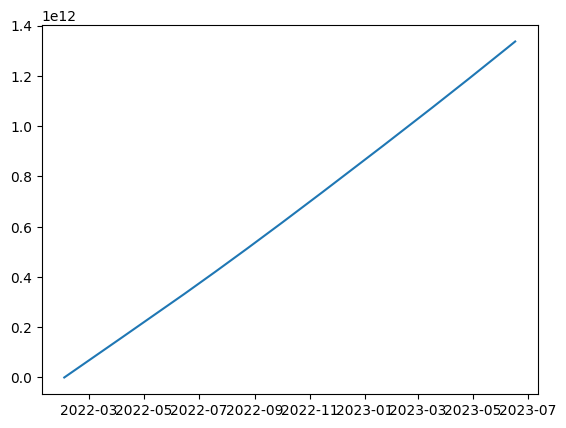

In [106]:
plt.plot(df['Cont_TotalEnergy(kWh)'].cumsum())

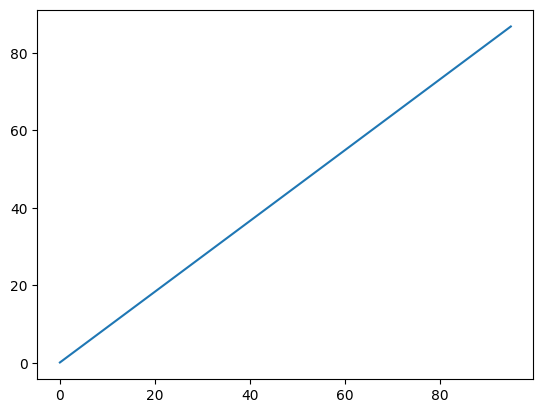

In [91]:
plt.plot(train_target_scaler.inverse_transform(b['Cont_TotalEnergy(kWh)'].to_numpy().reshape(-1, 1)).cumsum())

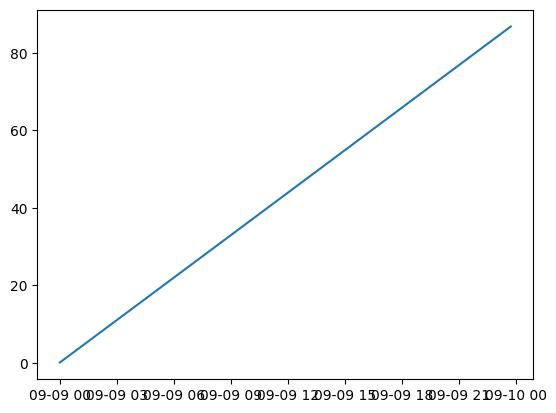

In [92]:
plt.plot(b['Cont_TotalEnergy(kWh)'].cumsum())

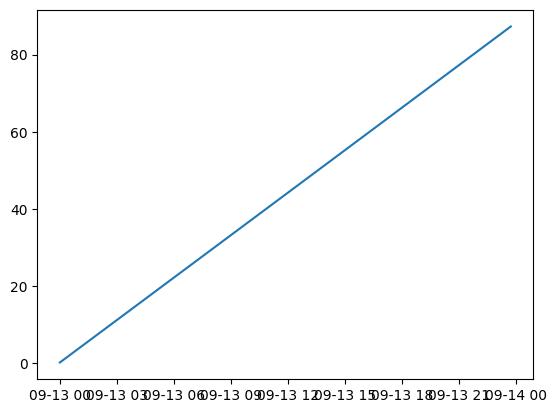

In [93]:
plt.plot(a['Cont_TotalEnergy(kWh)'].cumsum())

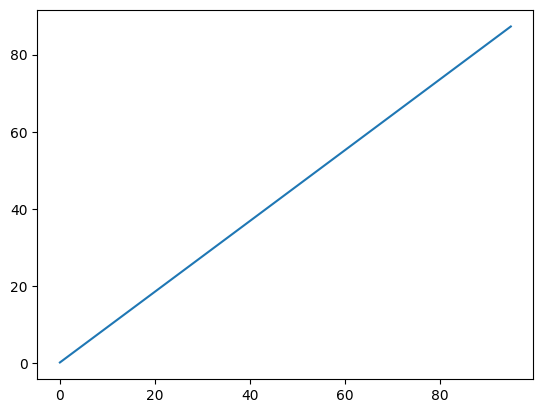

In [94]:
plt.plot(train_target_scaler.inverse_transform(a['Cont_TotalEnergy(kWh)'].to_numpy().reshape(-1, 1)).cumsum())

In [77]:
import matplotlib.pyplot as plt

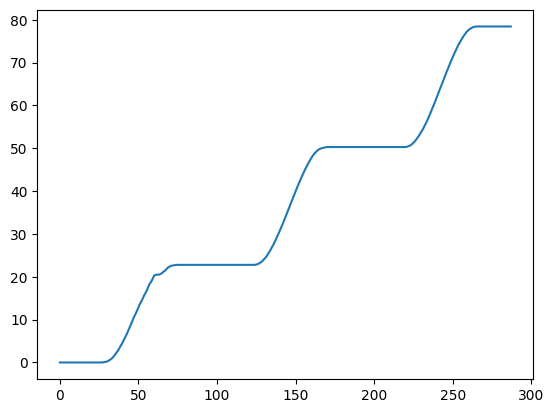

In [95]:
plt.plot(train_target_scaler.inverse_transform(t.to_numpy().reshape(-1, 1)).cumsum())

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)

In [12]:
b_before, b_target, b_future, b_after, b_m_b, b_m_t, b_m_a, b_timestamps = next(iter(train_dataloader))
print(b_before.shape, b_target.shape, b_future.shape, b_after.shape)
train_dataset.reset()

torch.Size([10, 96, 48]) torch.Size([10, 384, 1]) torch.Size([10, 384, 18]) torch.Size([10, 96, 48])


In [142]:
(b_target * b_future[:,:,-1].reshape(b_target.shape)).shape

torch.Size([10, 384, 1])

In [132]:
b_target.shape

torch.Size([10, 384, 1])

In [32]:
b_before[0]

tensor([[0.0000, 0.0000, 0.2718,  ..., 0.2942, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5623,  ..., 0.1919, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5623,  ..., 0.1919, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.5672,  ..., 0.1919, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5672,  ..., 0.1919, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5672,  ..., 0.1919, 0.0000, 0.0000]])

In [30]:
b_before.shape

torch.Size([10, 96, 48])

In [29]:
b_target.shape

torch.Size([10, 384, 1])

In [12]:
val_dataset = CustomDataset(val_df, BATCH_SIZE)

In [13]:
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)

In [17]:
for b_vbefore, b_vtarget, b_vafter, b_vm_b, b_vm_t, b_vm_a, b_vtimestamps in val_dl:
    print(b_vbefore.shape, b_vtarget.shape, b_vafter.shape)
    print()
    #display(b_timestamps[0])

1148 2023-01-01 00:05:00-2023-01-04 23:55:00
1148 2023-01-09 00:05:00-2023-01-12 23:55:00
1148 2023-01-13 00:05:00-2023-01-16 23:55:00
1148 2023-01-22 00:05:00-2023-01-25 23:55:00
1148 2023-01-05 00:05:00-2023-01-08 23:55:00
1148 2023-01-03 00:05:00-2023-01-06 23:55:00
1148 2023-01-02 00:05:00-2023-01-05 23:55:00
1148 2023-01-25 00:05:00-2023-01-28 23:55:00
1148 2023-01-15 00:05:00-2023-01-18 23:55:00
1148 2023-01-24 00:05:00-2023-01-27 23:55:00
torch.Size([10, 287, 47]) torch.Size([10, 574, 47]) torch.Size([10, 287, 47])

1722 2023-01-14 00:05:00-2023-01-19 23:55:00
1722 2023-01-08 00:05:00-2023-01-13 23:55:00
1722 2023-01-16 00:05:00-2023-01-21 23:55:00
1722 2023-01-23 00:05:00-2023-01-28 23:55:00
1722 2023-01-11 00:05:00-2023-01-16 23:55:00
1722 2023-01-07 00:05:00-2023-01-12 23:55:00
1722 2023-01-20 00:05:00-2023-01-25 23:55:00
1722 2023-01-04 00:05:00-2023-01-09 23:55:00
1722 2023-01-12 00:05:00-2023-01-17 23:55:00
1722 2023-01-06 00:05:00-2023-01-11 23:55:00
torch.Size([10, 287, 

## Model Settings

In [2]:
import torch.nn.functional as F
from torch import nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchview import draw_graph
import graphviz

graphviz.set_jupyter_format('png')

'svg'

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
#device = "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
run = wandb.init(
    project="interpolation",
    name="Giga Recurrent Random Unbounded Network (15 Min) ➿",
    config={
        "learning_rate": 0.001,
        "architecture": "GRRUNH",
        "dataset": "RofiloAnnuale-FullCyclingEncoding",
        "epochs": 100,
        "batch_size": BATCH_SIZE, #10
        "window_size": 1,
        "target_size": 1,
    },
    notes="Aggiunta moltiplicazione tra model output e isday\nLa moltiplicazione viene fatta nel modello.\nPlot solargis.",
)

wandb: Currently logged in as: nicolo-vescera (rofilopd). Use `wandb login --relogin` to force relogin


### Model Settings & Architecture

In [5]:
%run ./Modules/ModelSettings.ipynb

In [6]:
model = NeuralNetwork().to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=run.config['learning_rate'])
optimizer = torch.optim.Adam(model.parameters(), lr=run.config['learning_rate'])

print(model)
print(optimizer)

run.config['optimizer'] = optimizer

NeuralNetwork(
  (input_before): GRU(48, 32, batch_first=True)
  (input_after): GRU(48, 32, batch_first=True)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear1_2): Linear(in_features=64, out_features=128, bias=True)
  (linear2_2): Linear(in_features=128, out_features=128, bias=True)
  (loopGru): GRU(18, 128, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [7]:
model_graph = draw_graph(model, input_size=[(5, 287, 48), (5, 287, 48), (5, 287, 18)], save_graph=True, expand_nested=True, device=device)
model_graph.visual_graph
run.log({"Model Shape": wandb.Image("model.gv.png")})

In [26]:
batch_idx, (before, target, future, after, m_b, m_t, m_a, timestamp) = next(enumerate(train_dataloader))
before, target, future, after= before.to(device), target.to(device), future.to(device), after.to(device)

train_probs = model.test(before, after, future)

Out Encoder:  torch.Size([10, 1, 64])
Out Middle:  torch.Size([10, 1, 128])
Out Decoder:  torch.Size([10, 287, 128])
Output:  torch.Size([10, 287, 1])


### Find LR

In [19]:
%run ./Modules/FindLR.ipynb

## Training

  0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 01/100 | Train Loss 0.029 | Val Loss 0.036
	Saving model (improve loss) 1000000.0 -> 0.036393385380506516
Epoch 02/100 | Train Loss 0.027 | Val Loss 0.028
	Saving model (improve loss) 0.036393385380506516 -> 0.02842581272125244
Epoch 03/100 | Train Loss 0.043 | Val Loss 0.029
Epoch 04/100 | Train Loss 0.023 | Val Loss 0.028
	Saving model (improve loss) 0.02842581272125244 -> 0.028242643922567368
Epoch 05/100 | Train Loss 0.024 | Val Loss 0.029
Epoch 06/100 | Train Loss 0.039 | Val Loss 0.026
	Saving model (improve loss) 0.028242643922567368 -> 0.025914132595062256
Epoch 07/100 | Train Loss 0.025 | Val Loss 0.029
Epoch 08/100 | Train Loss 0.028 | Val Loss 0.026
Epoch 09/100 | Train Loss 0.038 | Val Loss 0.028
Epoch 10/100 | Train Loss 0.023 | Val Loss 0.026
	Saving model (improve loss) 0.025914132595062256 -> 0.02556489408016205
Epoch 11/100 | Train Loss 0.039 | Val Loss 0.028
Epoch 12/100 | Train Loss 0.027 | Val Loss 0.027
Epoch 13/100 | Train Loss 0.022 | Val Loss 0.028
Epoch 1

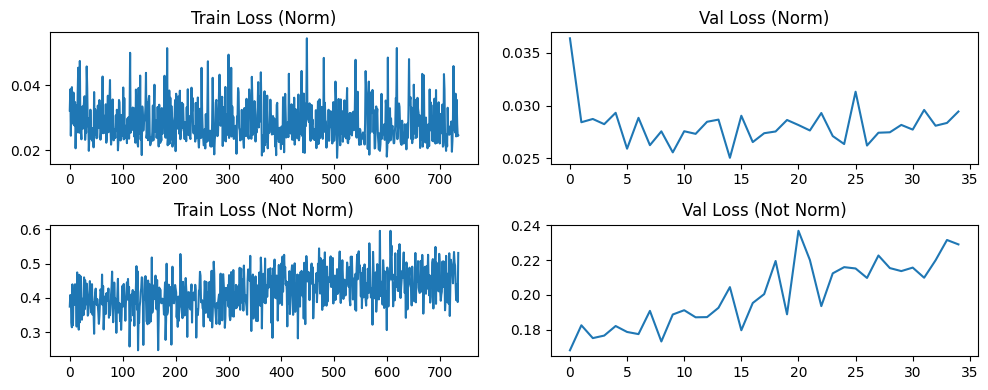

In [11]:
# definizione datasets e dataloaders
# vengono istanziati ogni volta che la run ha inizio così da gestire meglio ed impedire
# errori sul calcolo dei batch
train_dataset = CustomDataset(train_df, BATCH_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)
val_dataset = CustomDataset(val_df, BATCH_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)

t_loss_list, t_loss_notnorm_list, v_loss_list, v_loss_notnorm_list = [], [], [], []
loop = tqdm(range(run.config['epochs']), unit="epoch")
early_stopping = EarlyStopper(patience=20)
best_vloss = 1_000_000.
loss = nn.L1Loss()

run.config['early_stopping'] = str(early_stopping)
run.config['save_best'] = True
run.watch(model)

for epoch in loop:
    model.train()
    for batch_idx, (before, target, future, after, m_b, b_t, m_a, timestamps, _) in enumerate(train_dataloader):        
        target, before, after, future = target.to(device), before.to(device), after.to(device), future.to(device)
        
        train_pred = model(before, after, future)
        train_loss = loss((train_pred/train_pred.sum(dim=(1,2), keepdim=True)) * target.sum(dim=(1,2), keepdim=True), target)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        t_loss_list.append(train_loss.item())

        with torch.no_grad(): # TODO: ricontrollare
            t_loss_notnorm_list.append(loss(train_pred, target).item())

    model.eval()
    running_vloss = 0.0
    running_vloss_notnorm = 0.0

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, (vbefore, vtarget, vfuture, vafter, vm_b, vm_t, vm_a, vtimestamp, _) in enumerate(val_dataloader):
            vbefore, vtarget, vfuture, vafter = vbefore.to(device), vtarget.to(device), vfuture.to(device), vafter.to(device)
            voutputs = model(vbefore, vafter, vfuture)
            #vloss = loss(voutputs, vtarget)
            # voutputs = (voutputs * vfuture[:,:,-1].reshape(voutputs.shape)) # output * isday
            vloss = loss((voutputs/voutputs.sum(dim=(1,2), keepdim=True)) * vtarget.sum(dim=(1,2), keepdim=True), vtarget)
            vloss_notnorm = loss(voutputs, vtarget)

            running_vloss += vloss
            running_vloss_notnorm += vloss_notnorm

    # resetting dataset generation
    # TODO: fix con DROP LAST
    train_dataset.reset()
    val_dataset.reset()
    
    avg_vloss = running_vloss / (i + 1) # TODO: ricontrollare
    avg_vloss_notnorm = running_vloss_notnorm / (i + 1) # TODO: ricontrollare

    v_loss_list.append(avg_vloss.item())
    v_loss_notnorm_list.append(avg_vloss_notnorm.item())
    
    loop.set_description(f"Epoch [{epoch}/{run.config['epochs']}]")
    loop.set_postfix(loss=t_loss_list[-1], val_loss=v_loss_list[-1])
    
    run.log({"loss": t_loss_list[-1], "val_loss": v_loss_list[-1]})
    
    print(
            f"Epoch {epoch+1:02d}/{run.config['epochs']:02d}"
            f" | Train Loss {t_loss_list[-1]:.3f}"
            f" | Val Loss {v_loss_list[-1]:.3f}"
        )
    
    # save model when improves loss
    if avg_vloss < best_vloss:
        print(f"\tSaving model (improve loss) {best_vloss} -> {avg_vloss}")
        best_vloss = avg_vloss
        model_path = f"./models/GRRUN15MIN_b{run.config['batch_size']}_e{run.config['epochs']}.model"
        torch.save(model.state_dict(), model_path)

    # check for early stopping
    if early_stopping.early_stop(v_loss_list[-1]):
        print(f"\tEarly Stopping @ epoch {epoch} loss: {t_loss_list[-1]} val_loss: {v_loss_list[-1]}")
        break

# plot training/validation loss
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
axes[0, 0].set_title("Train Loss (Norm)")
axes[0, 0].plot(t_loss_list)
axes[0, 1].set_title("Val Loss (Norm)")
axes[0, 1].plot(v_loss_list)
axes[1, 0].set_title("Train Loss (Not Norm)")
axes[1, 0].plot(t_loss_notnorm_list)
axes[1, 1].set_title("Val Loss (Not Norm)")
axes[1, 1].plot(v_loss_notnorm_list)
fig.tight_layout()

## Evaluation

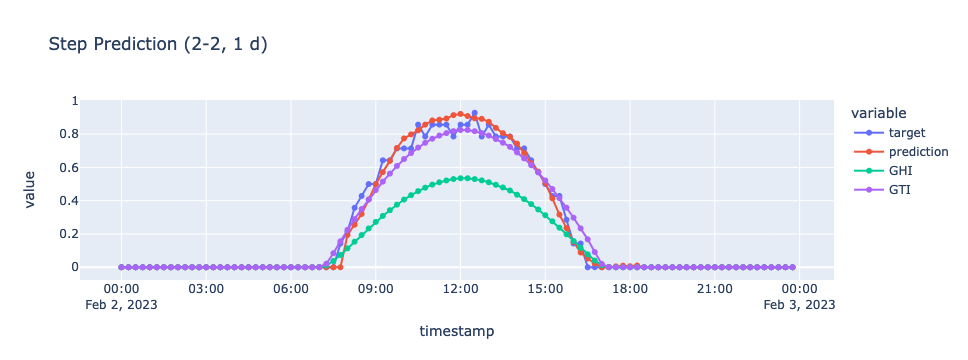

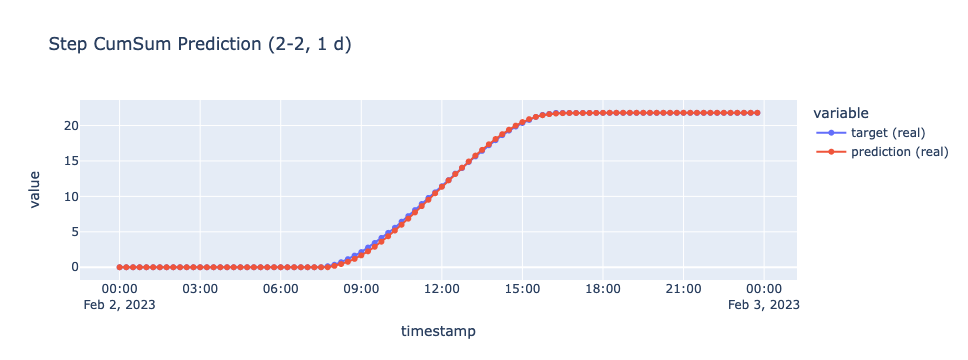

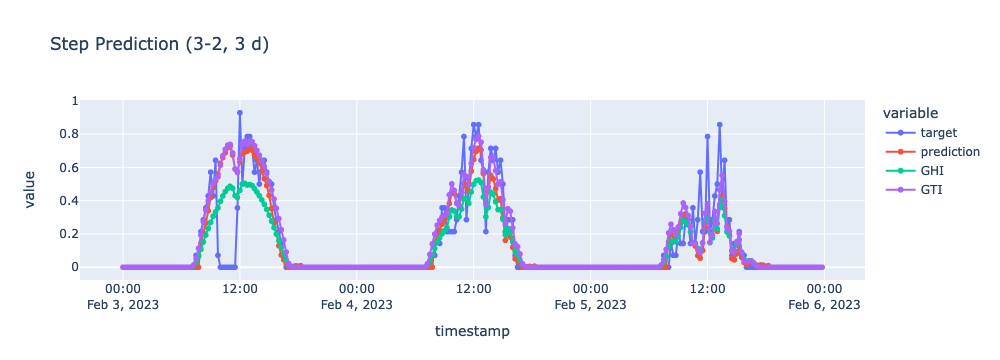

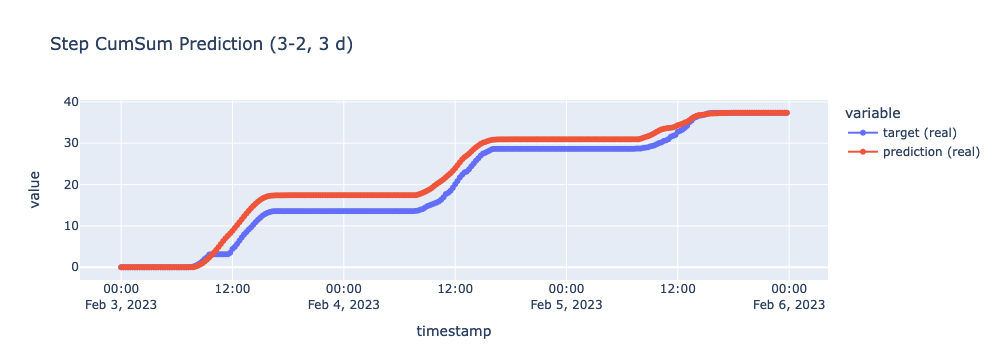

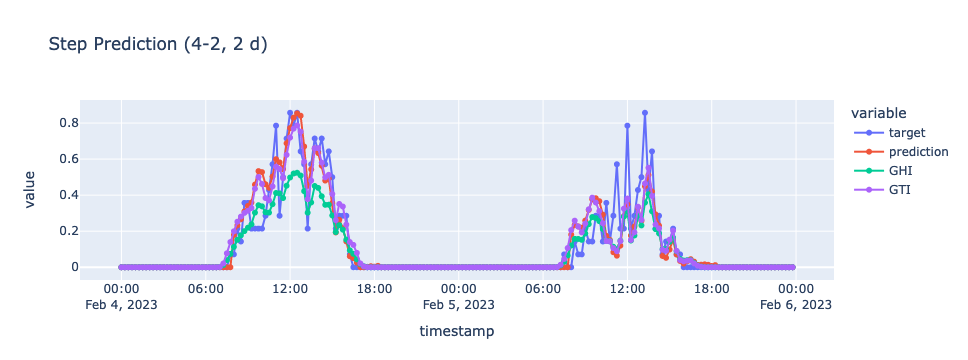

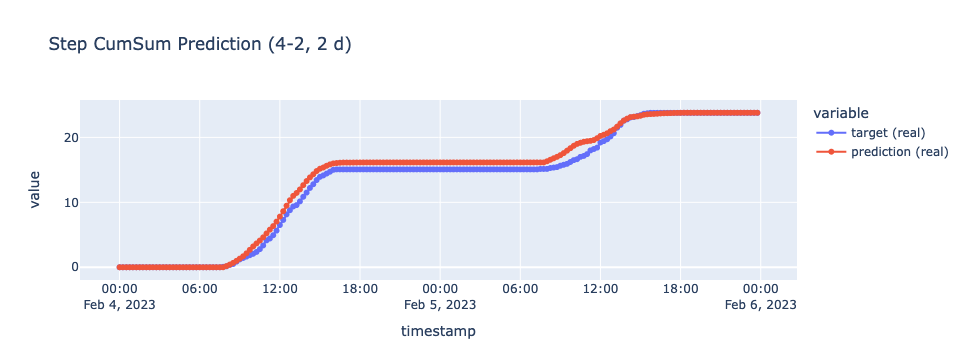

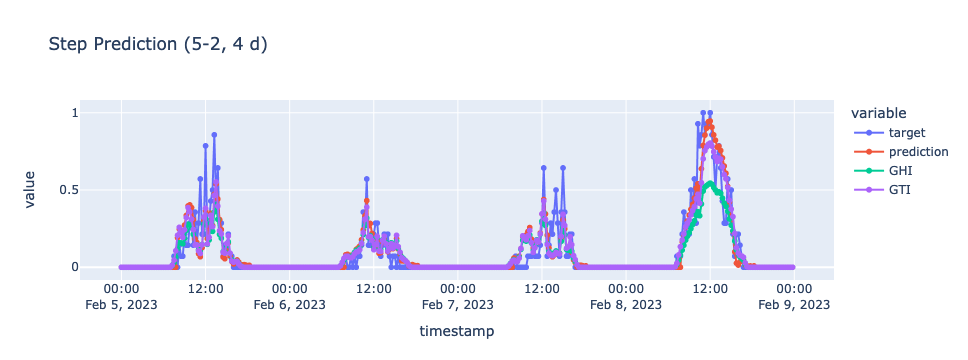

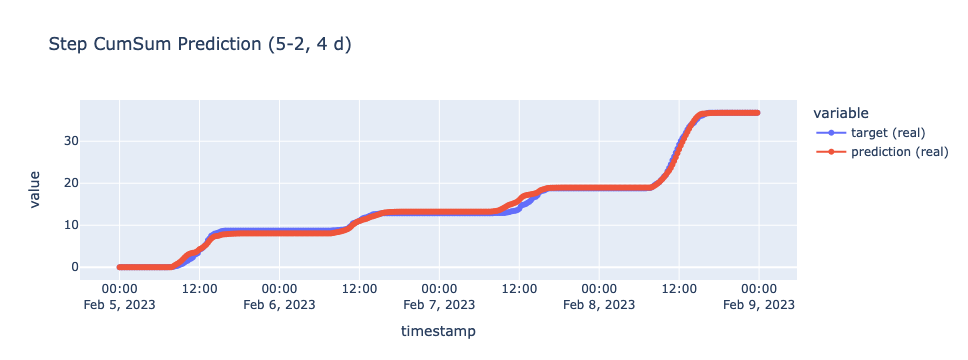

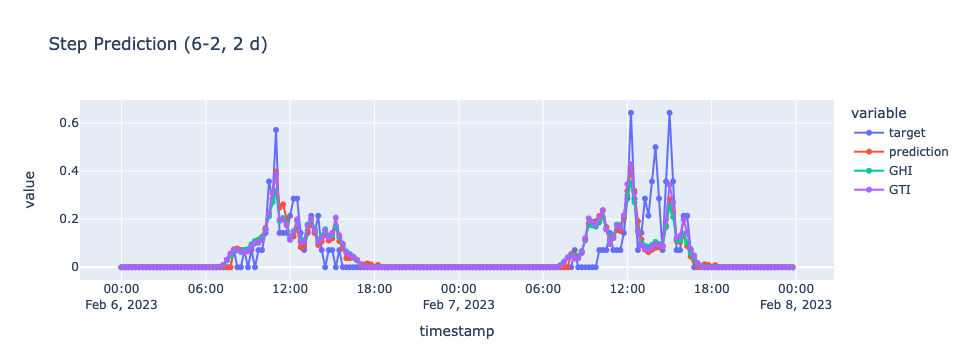

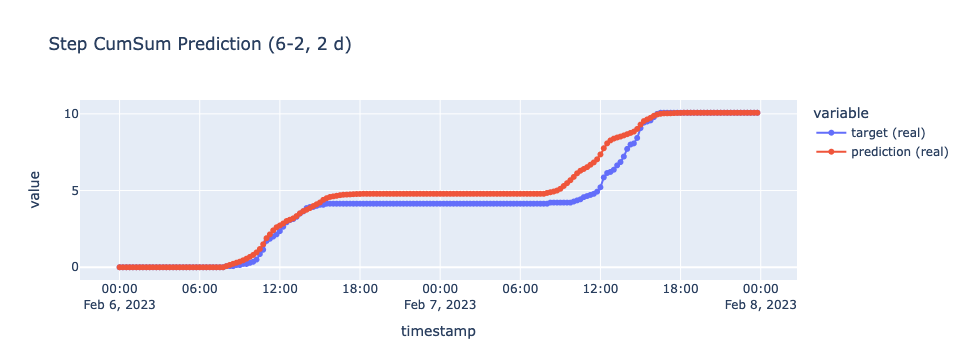

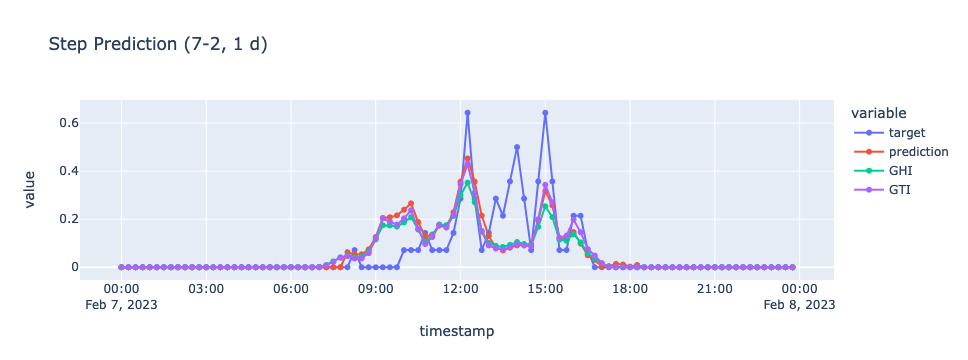

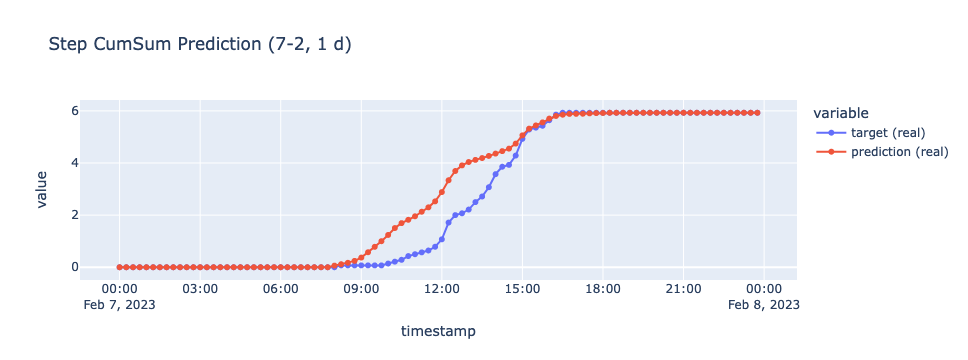

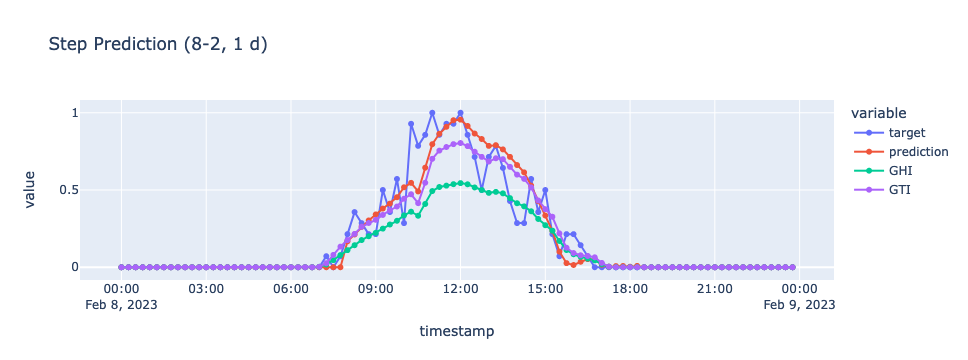

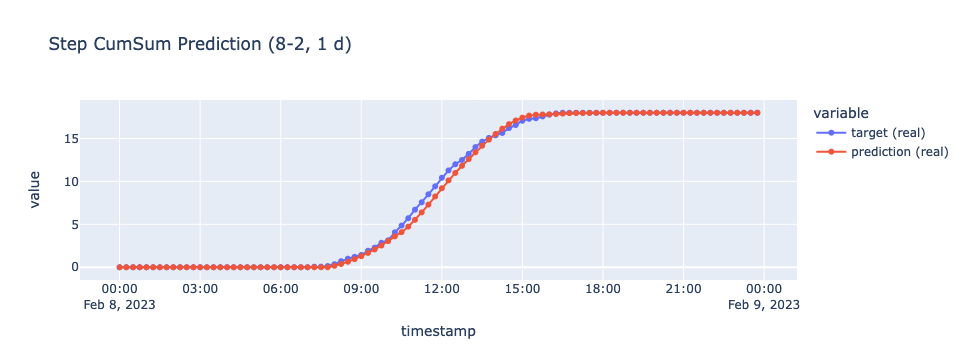

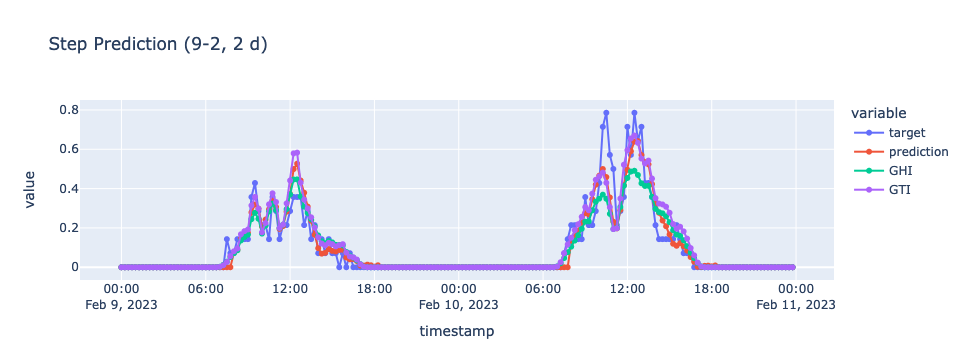

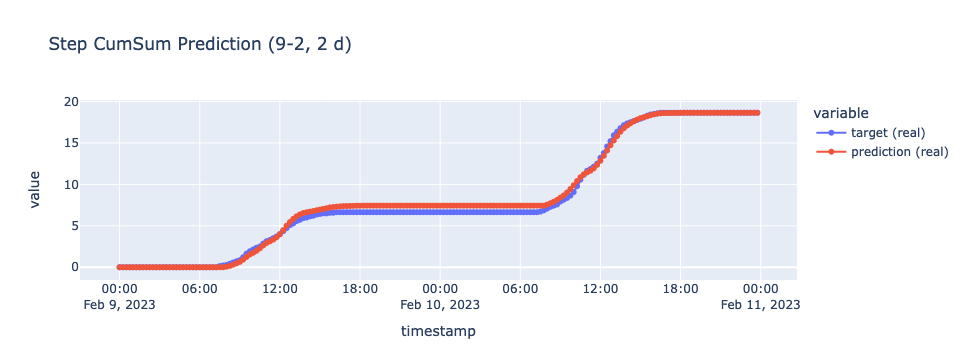

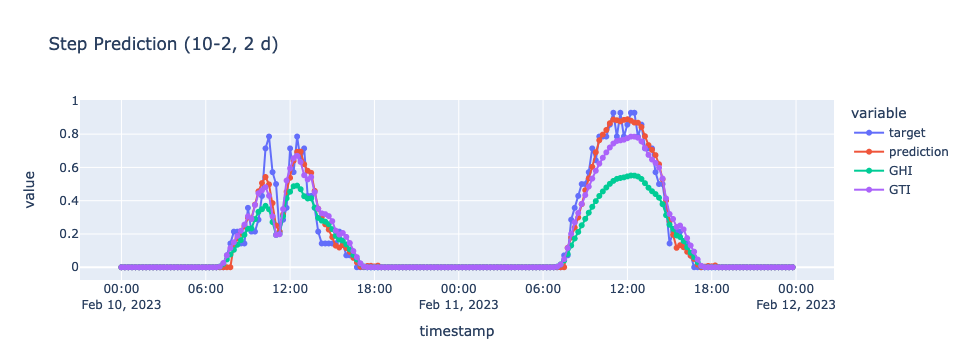

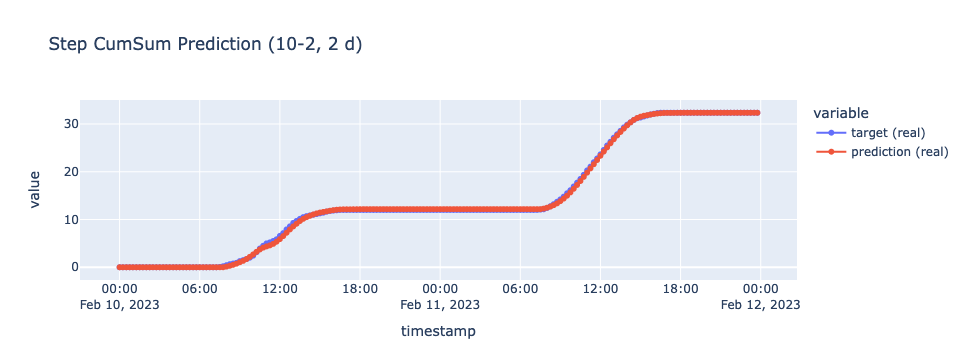

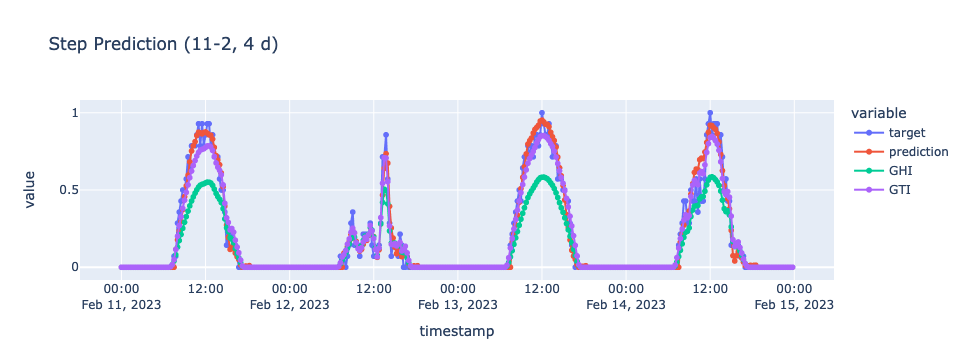

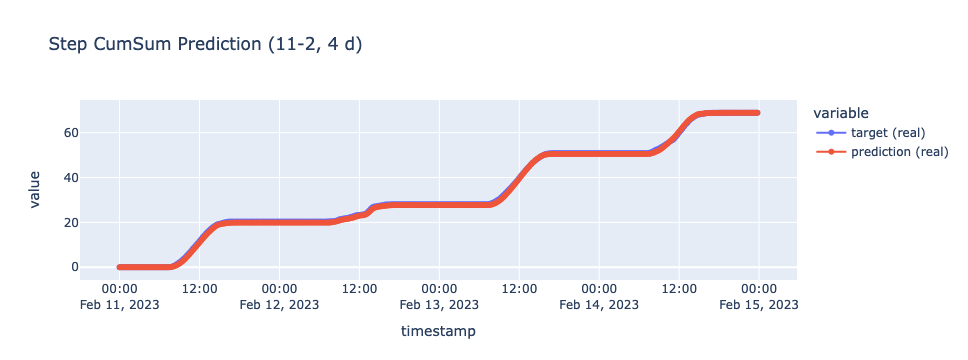

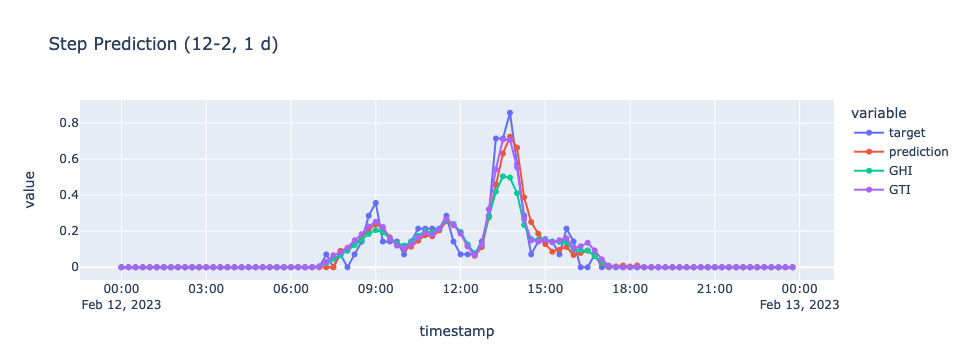

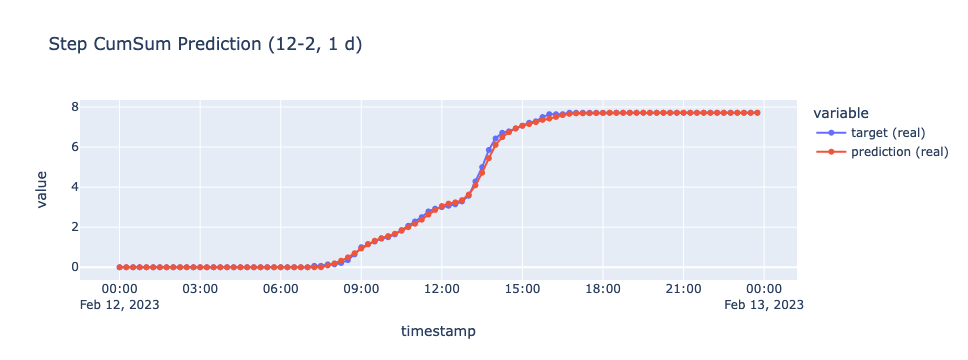

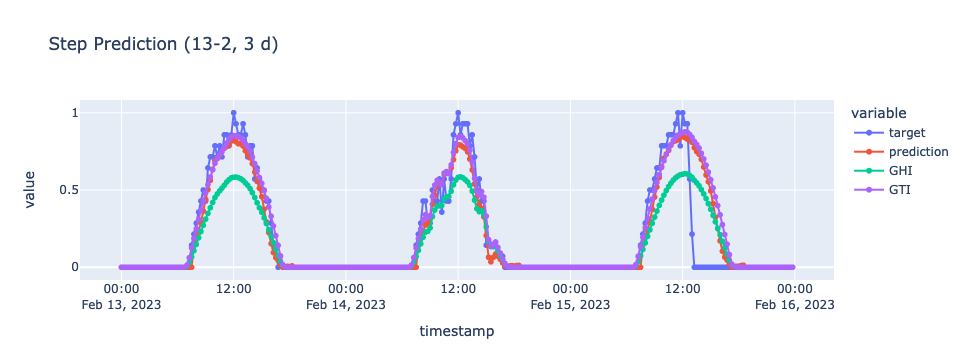

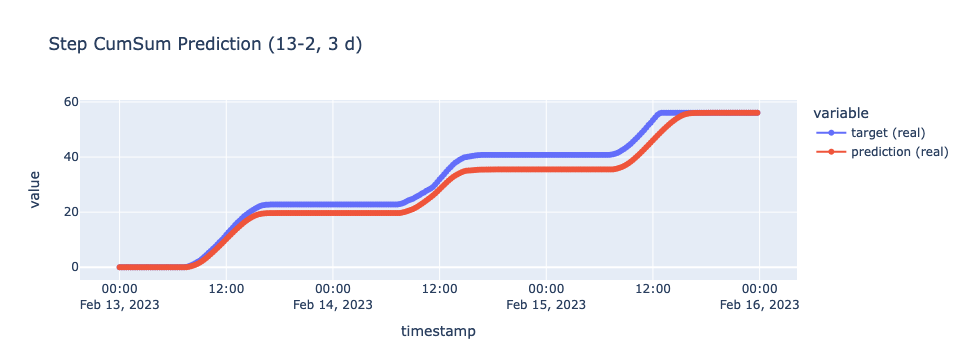

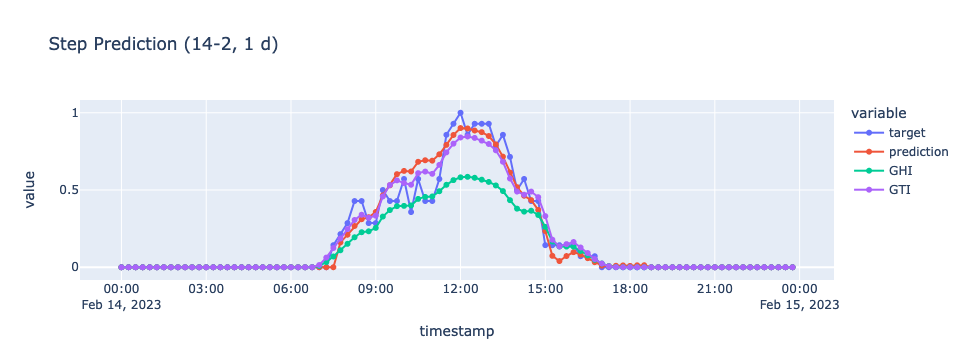

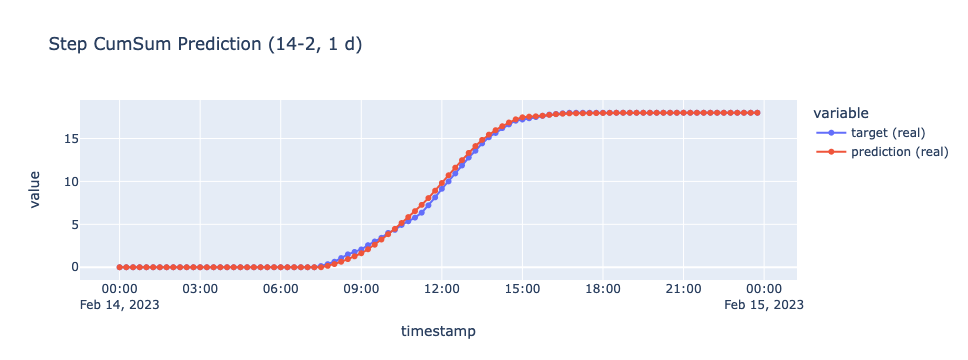

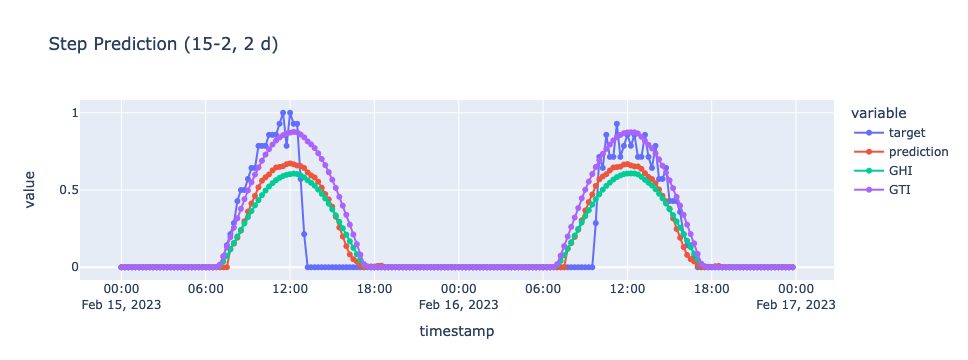

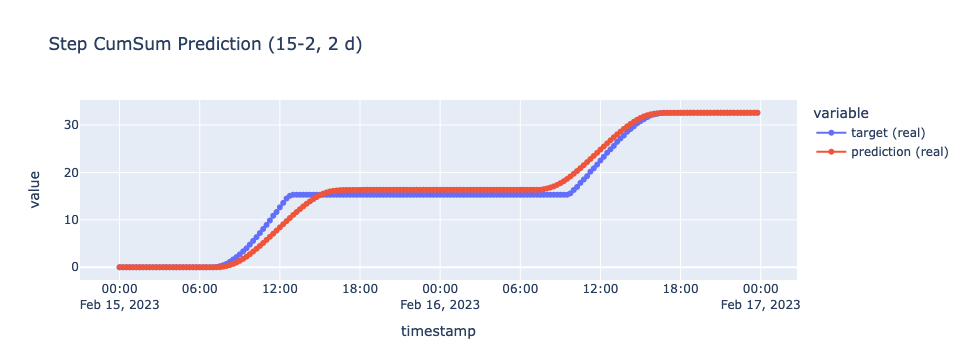

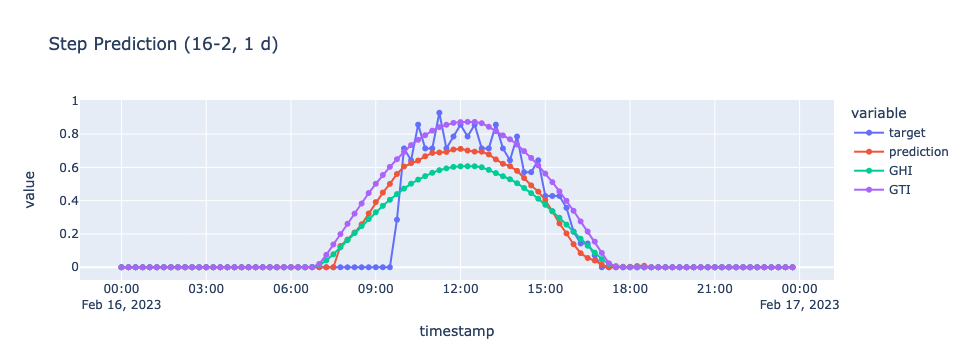

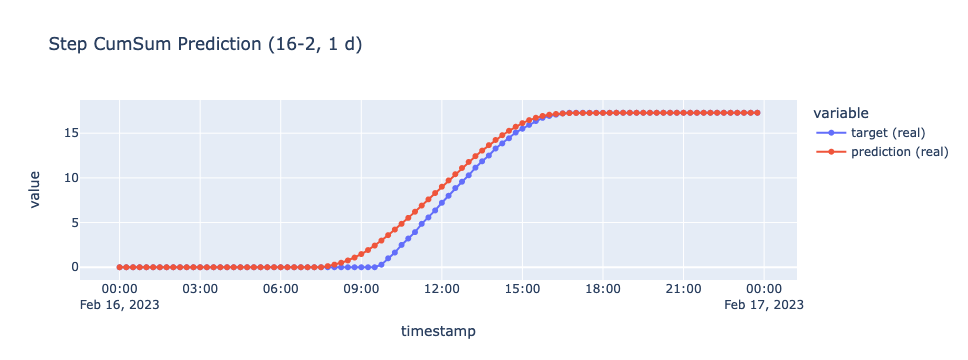

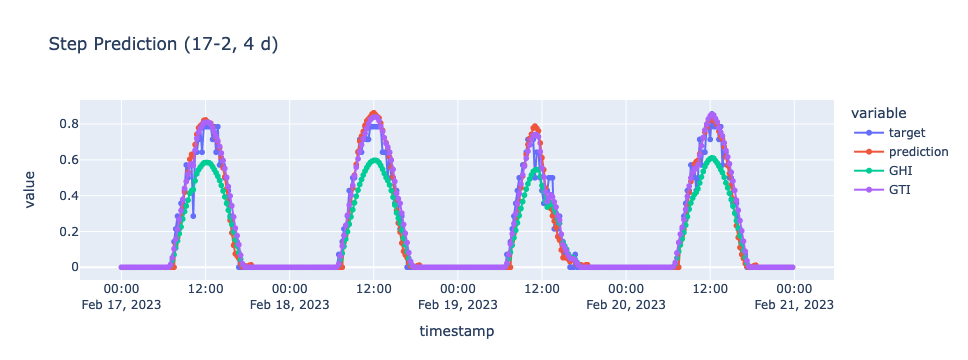

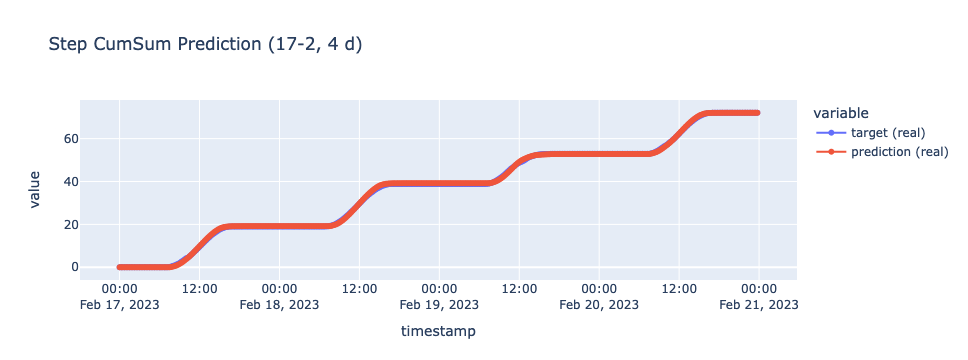

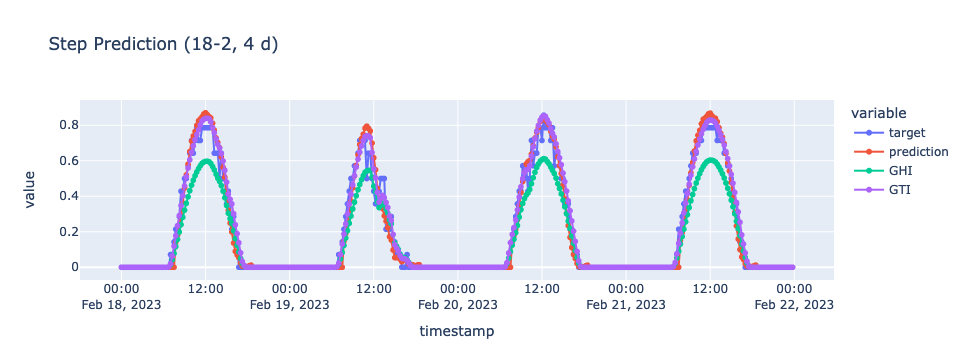

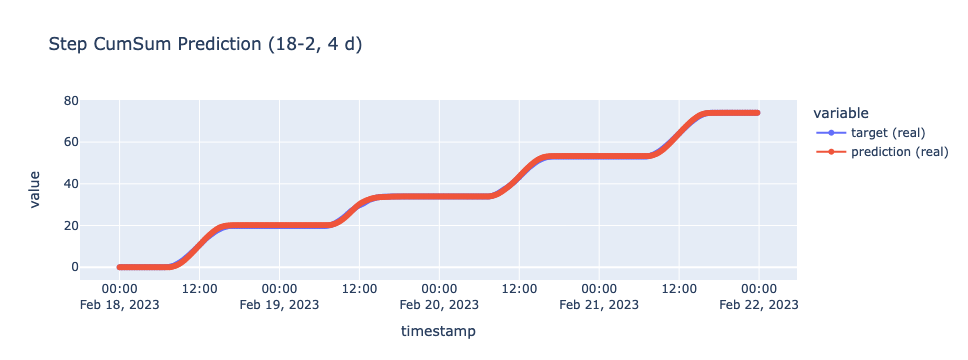

UsageError: Run (6zt8wnw4) is finished. The call to `log` will be ignored. Please make sure that you are using an active run.

In [22]:
%run ./Modules/Evaluation.ipynb
model.load_state_dict(torch.load('./models/GRRUN15MIN_b10_e100.model'))
evaluate(model)